# Explaining Catboost Model using SHAP

Loading necessary libraries

In [5]:
from catboost import CatBoostRegressor
import numpy as np
import pandas as pd
import shap

We now load our saved model.

In [3]:
cat_reg = CatBoostRegressor().load_model('CatboostRegressorModel')

We then load and process the dataset the same way we did previously.

In [6]:
df = pd.read_csv('characters_cleaned.csv', index_col = [0])
cat_features = ['Gender', 'Marital_Status', 'Eye_Color', 'Hair_Color', 'Living_Status', 'Reality', 'Identity']
all_features = ['Height', 'Weight', 'Year_Introduced']
all_features.extend(cat_features)
X = df[all_features].copy()
y = df['Average_Annual_Appearances'].copy()
X[cat_features] = X[cat_features].astype('str')
X.dtypes

Height             float64
Weight             float64
Year_Introduced    float64
Gender              object
Marital_Status      object
Eye_Color           object
Hair_Color          object
Living_Status       object
Reality             object
Identity            object
dtype: object

We then use SHAP for model explainability.

In [7]:
explainer = shap.Explainer(cat_reg)
shap_values = explainer(X)

The following beeswarm plot shows us that in general, lower values of Year_Introduced, Height, and Weight contribute positively to the model prediction.

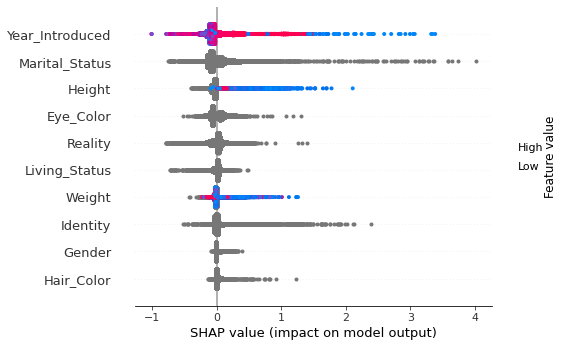

In [8]:
shap.plots.beeswarm(shap_values)

We then use a barplot to visualize feature importance. The plot suggests that Year_Introduced, Marital_Status, Height, and Eye_Color have the most contributions when it comes to the model prediction on average, with Gender and Hair_Color having the least contributions.

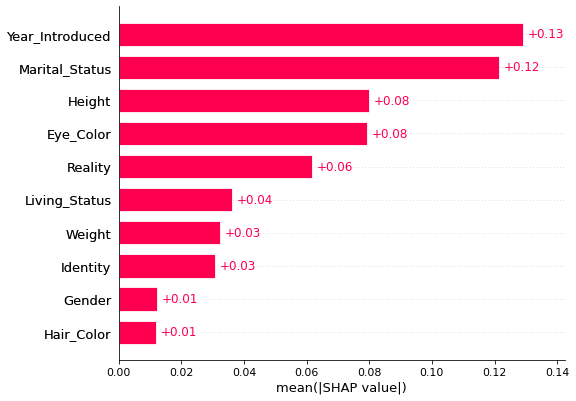

In [9]:
shap.plots.bar(shap_values)

One major advantage of using SHAP for model explainability is its ability to explain individual instances. The code below allows us to specify a Marvel character and output a waterfall plot that visualizes the SHAP values for its features, and how they push the prediction for this instance away from the mean prediction.

In [50]:
def explain_char(name):
    x = df[df['Name'] == name][all_features]
    x[cat_features] = x[cat_features].astype('str')
    for i in range(len(X)):
        x_i = X.iloc[i,:]
        flag = True
        for feature in all_features:
            if str(x_i[feature]) == str(x[feature][x.index.tolist()[0]]):
                continue
            else:
                flag = False
                break
        if flag:
            shap.plots.waterfall(shap_values[i])
            break
        else:
            continue 

We try this function on two of the most famous characters in Marvel comics: Spiderman and Ironman. From these plots, we consistently see how Year_Introduced and Height contribute the most to the prediction, with Hair_Color and Gender contributing the least.

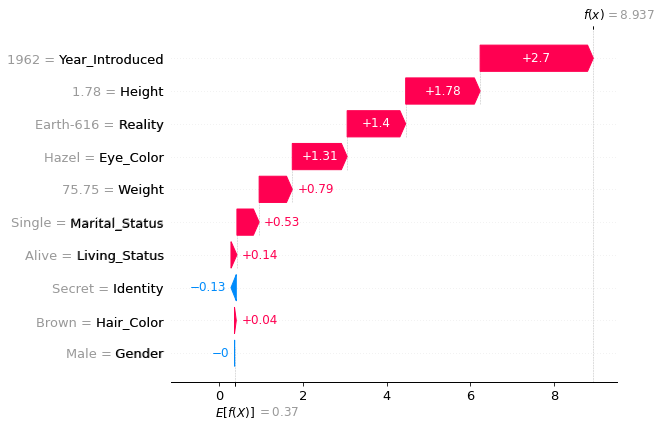

In [51]:
explain_char('Peter Parker (Earth-616)')

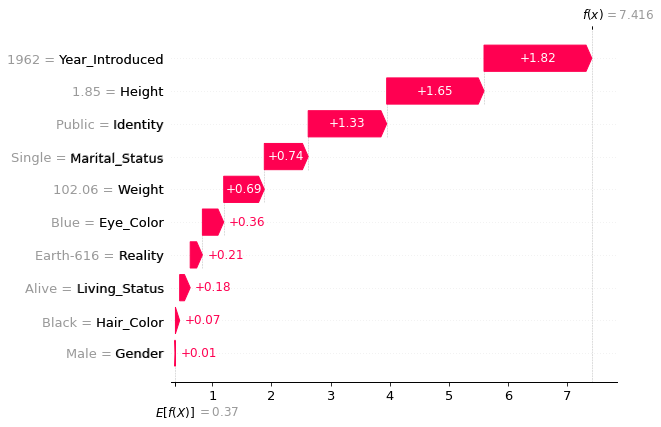

In [52]:
explain_char('Anthony Stark (Earth-616)')